# Setup

#### If you only want to run current injection simulations using our L5tt model, please do the following:
1. download and install Anaconda 2.7 https://www.continuum.io/Downloads
2. install neuron such that you can import it as python module
3. install sumatra: `pip install sumatra`
4. clone the single_cell_parser git respository: `git clone https://github.com/abast/single_cell_parser.git`
5. Add the resulting folder single_cell_parser to the PYTHONPATH variable: `export PYTHONPATH=$PYTHONPATH:/my/freshly/cloned/repository`
6. make sure you can import that module in python: `import single_cell_parser as scp`
7. open the file 86_CDK_20041214_BAC_run5_soma_Hay2013_C2center_apic_rec.param and adapt the following paths:
       "NMODL_mechanisms" --> "channels": has to point to the absolute path of the mechanism subfolder in the single_cell_parser_module
       "neuron" --> "filename": has to point to the neuron morphology
       
If you want to try out the simulator immediately, jump to "How to simulate current injections"

##### What are these packages doing?
 - sumatra: we use it to read and write to parameterfiles (which might be a bit of an overkill)
 - single_cell_parser: module written by Robert Egger wrapping around neuron. It provides a high level interface specifically build to simulate full compartmental models and synaptic input.

    
#### If you also want to run simulations with synaptic input, please install in addition:
1. install pandas from git master: `pip install -U git+https://github.com/pandas-dev/pandas.git` (it has to contain this commit: https://github.com/pandas-dev/pandas/pull/15493)
2. dask 0.14: `conda install dask==0.14`
3. distributed 1.15.2: `conda install distributed=1.15.2`
4. SingleCellInputMapper: `git clone https://github.com/abast/SingleCellInputMapper.git`
5. Add the resulting folder to the PYTHONPATH variable: `export PYTHONPATH=$PYTHONPATH:/my/freshly/cloned/repository`
6. model_data_base: `https://github.com/abast/model_data_base.git`
7. Add the resulting folder to the PYTHONPATH variable: `export PYTHONPATH=$PYTHONPATH:/my/freshly/cloned/repository`
8. Open the file model_data_base/simrun2/seed_manager and adjust the variable `path`. This will specify the location where used seeds are saved

##### what are these packages doing?
 - pandas is a library for panel data analysis
 - dask is a python library for dynamic task scheduling and parallel numpy/pandas computations 
 - distributed allows to execute dask graphs on a distributed system
 - SingleCellInputMapper: maps synapses on a single cell and thereby integrates it in the barrel cortex model
 - model_data base: contains modules to run simulations and analyze the result in parallel. It uses dask for parallelization.


# How to simulate synaptic input

In [10]:
import os
getting_started_files = '/nas1/Data_arco/project_src/model_data_base/getting_started_files/' #change that path for your cloned repository

### Register cell morphology
The coordinates in the hoc morphology file need to be choosen according to the coordinate system of the barrel cortex model. There is a morphology file in the getting_started subfolder, which is registered such that the cell is in the center of the C2 column. For the following steps, this morphology is used.

### Generate anatomical model

To integrate the registered cell morphology in the barrel cortex model, we need the SingleCellInputMapper repository. To do the mapping, we need to specify the path to the registered hoc morphology and the celltype. To calculate the connectivity of the example cell, we can do the following:

In [59]:
import map_singlecell_inputs # core module of the SingleCellInputMapper repository
import Interface as I
# the singlecell input mapper is very talkative, therefore silence it.
silent_map_singlecell = lambda *args, **kwargs: I.silence_stdout(map_singlecell_inputs.map_singlecell_inputs, **kwargs)(*args)
#specify parameters
path_to_registered_hoc_morphology = os.path.join(getting_started_files, '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center.hoc')
celltype = 'L5tt'

Now we can call the network mapper. Under the hood, 50 network realizations will be calculated. Out of these, the one that is closest to the average is choosen. The result is saved in the same folder as the hoc morphology. This takes about 4 hrs.

In [ ]:
silent_map_singlecell(path_to_registered_hoc_morphology, celltype)

##### How does the result look like?
An precomputed result is in the subfolder model_data_base/getting_started_files/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389

The important files are:
 - The  *_summary_*.csv file contains a summary statistics about the connectivity between all presynaptic populations and our neuron.
 - The *.con file and the *. syn file are the relevant output of the SingleCellMapper for simulations of evoked activity.

The con file maps between presynaptic cells and synapses:

In [63]:
with open(os.path.join(getting_started_files, '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389.con')) as f:
    print f.read()[:300]

# Anatomical connectivity realization file; only valid with synapse realization:
# 86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389.syn
# Type - cell ID - synapse ID

L6cc_A3	0	0
L6cc_A3	1	1
L6cc_A3	2	2
L6cc_A3	3	3
L6cc_A3	4	4
L6cc_A3	4	5
L6cc_A3	5	6


The .syn file specifies the exact position of each synapse on the hoc morphology:

In [64]:
with open(os.path.join(getting_started_files, '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389.syn')) as f:
    print f.read()[:300]

# Synapse distribution file
# corresponding to cell: 86_L5_86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center
# Type - section - section.x

VPM_E1	112	0.138046479525
VPM_E1	130	0.305058053119
VPM_E1	130	0.190509288017
VPM_E1	9	0.368760777084
VPM_E1	110	0.0
VPM_E1	11	0.120662910562


##### Sidenote: how to parallelize it?
in case we would like to map the input on several cells in parallel, we could utilize dask to parallelize it on using multiprocessing or a distributed cluster:

In [ ]:
# make the single cell mapper a delayed function
delayed_silent_map_singlecell = dask.delayed(silent_map_singlecell_outputs)
# call it with the morphologies
delayeds = [delayed_silent_map_singlecell_outputs(morphology_paths[p], 'L5tt') for p in morphology_paths]
# bundle everything in one delayed object
delayeds = dask.delayed(delayeds)
# compute the result, e.g. with the multiprocessing scheduler
delayeds.compute(get = dask.multiprocessing.get)

### Activate synapses
In the last step, the synapse location on the hoc morphology was specified. Now we need to activate the synapses according to experimental data.

##### create nr_of_connected_cells spreadsheet

In [65]:
# Todo: this should become a part of the pipeline above
import generate_nr_of_cells_spreadsheet
con_file = os.path.join(getting_started_files, '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389.con')
cellNumberFileName = generate_nr_of_cells_spreadsheet.con_file_to_NumberOfConnectedCells_sheet(con_file)

##### specify parameters

In [68]:
import evoked_network_param_from_template #module that allows to generate parameterfile on how to activate the synapses
ongoingTemplateParamName = os.path.join(getting_started_files, 'functional_constraints/ongoing_activity/ongoing_activity_celltype_template_exc_conductances_fitted.param')
# cellNumberFileName: see cell above
syn_file = os.path.join(getting_started_files, '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389.syn')
con_file = os.path.join(getting_started_files, '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389.con')
whisker = 'C2' #simulate C2 stimulus. Since out cell is located in C2center, this is a principal whisker stimulation scenario.
evoked_up_param_name = os.path.join(getting_started_files, 'functional_constraints/network.param')
evoked_network_param_from_template.create_network_parameter(ongoingTemplateParamName, cellNumberFileName, syn_file, con_file, whisker, evoked_up_param_name)    

*************
creating network parameter file from template /nas1/Data_arco/project_src/model_data_base/getting_started_files/functional_constraints/ongoing_activity/ongoing_activity_celltype_template_exc_conductances_fitted.param
*************


##### how does the result look like?

In [70]:
with open(evoked_up_param_name) as f:
    print f.read()[:4100]

{
  "info": {
    "date": "11Feb2015",
    "name": "ongoing_activity_up_state_anatomical_map_20150211-1430_22780",
    "author": "regger",
  },
  "network": {
    "L45Peak_D1": {
      "synapses": {
        "releaseProb": 0.25,
        "distributionFile": "/nas1/Data_arco/project_src/model_data_base/getting_started_files/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389.syn",
        "receptors": {
          "gaba_syn": {
            "threshold": 0.0,
            "delay": 0.0,
            "parameter": {
              "decaytime": 20.0,
              "risetime": 1.0,
              "decaygaba": 1.0,
              "e": -80.0,
              "facilgaba": 0.0,
            },
            "weight": 1.0,
          },
        },
        "connectionFile"

This file contains the activation pattern of every presynaptic population providing input to the single cell we want to simulate. One "population" in this case is one celltype in one column. Examples are: L45Peak_D1, L5tt_D2, L5tt_C2, VPM_C1, ...

In this file all the parameters necessary to constrain the timedependent acitvity of the synapses mapped onto the neuron are specified:
 - synapses --> releaseProb: chance that synapse gets activated if presynaptic cell gets activated
 - synapses --> distributionFile: pointing to the .syn file generated in the anatomical network mapping above
 - network --> [population] --> celltype --> pointcell --> spiketrain: mean ongoing frequency of the presynaptic populations
 - network --> [population] --> celltype --> pointcell --> probabilities: PSTH of evoked activity (will be added on top of ongoing activity)
 - network --> [population] --> celltype --> pointcell --> offset: timepoint at which the evoked activity starts
 - ...
 

## Determine channel densities such that the cell exhibits certain properties measured in slice data

Currently, the parameters are determined using a MOO approach. The result is manually in the cell parameter file:

In [74]:
cell_parameter_file = os.path.join(getting_started_files, '86_CDK_20041214_BAC_run5_soma_Hay2013_C2center_apic_rec.param')
with open(cell_parameter_file) as f:
    print f.read()[:1000]


{	
	"info":
	{
		"name":		"hay_2011_dend_test", 
		"author":	"regger",
		"date": 	"15Oct2014",
	},
	
	"NMODL_mechanisms":
	{
        "channels": "/nas1/Data_arco/project_src/single_cell_parser/mechanisms/channels/",
	},
	
	"mech_globals":
	{
	},
	
	"neuron":
	{
		"filename": "/nas1/Data_arco/project_src/single_cell_parser/example_files/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center.hoc",
		
		"Soma":
		{
			"properties":
			{
				"Ra": 100.0,
				"cm": 1.0,
                
                "ions":
                {
                    "ek": -85.0,
                    "ena": 50.0,
                },
			},
			
			"mechanisms":
			{
				"global":
				{
					
				},
				
				"range":
				{
                    "pas":
                    {
                        "spatial": "uniform",
                        "g": 0.0000326,
                        "e": -90,
                    },
                    "Ca_LVAst":
                    {
                        "spatial": 

### run the simulation

In [49]:
evoked_up_param_name # specified above
cell_parameter_file  #specified above
dir_prefix = getting_started_files #results are put here in a "results" subfolder
nSweeps= 10 # number of consecutive mounte carlo simulations per process
nprocs = 20 # number of processes simulating in parallel
tStop = 300 # stop the simulation at 300ms
silent = True # suppress output (disable this for debug purposes)

In [75]:
%time d = I.simrun_run_new_simulations(cell_param_name, evoked_up_param_name, dirPrefix=dir_prefix, nSweeps=nSweeps, nprocs=nprocs, tStop=tStop, silent=silent)
d

CPU times: user 84 ms, sys: 4 ms, total: 88 ms
Wall time: 191 ms


Delayed('lambda-f65f168f-e02f-439a-a158-fae131ed88fe')

The result is a dask delayed object, in which a **plan** how to compute result is stored. To compute it, you need call `compute`

In [55]:
import dask
d.compute(get = dask.multiprocessing.get) # run the simulation using the multiprocessing scheduler

(['/nas1/Data_arco/project_src/model_data_base/getting_started_files/results/20170327-0745_seed4012452078',
  '/nas1/Data_arco/project_src/model_data_base/getting_started_files/results/20170327-0745_seed2404771358',
  '/nas1/Data_arco/project_src/model_data_base/getting_started_files/results/20170327-0745_seed1389732352',
  '/nas1/Data_arco/project_src/model_data_base/getting_started_files/results/20170327-0745_seed3778252701',
  '/nas1/Data_arco/project_src/model_data_base/getting_started_files/results/20170327-0745_seed2424913915',
  '/nas1/Data_arco/project_src/model_data_base/getting_started_files/results/20170327-0745_seed356876589',
  '/nas1/Data_arco/project_src/model_data_base/getting_started_files/results/20170327-0745_seed4215231467',
  '/nas1/Data_arco/project_src/model_data_base/getting_started_files/results/20170327-0745_seed985246582',
  '/nas1/Data_arco/project_src/model_data_base/getting_started_files/results/20170327-0745_seed2427112984',
  '/nas1/Data_arco/project_src

### load simulation results in database to make them accessible in python

In [4]:
import Interface as I
mdb = I.ModelDataBase(os.path.join(getting_started_files, 'mdb')) #specify home folder of database

In [4]:
I.mdb_init_simrun_general.init(mdb, os.path.join(getting_started_files, 'results'))

---building data base core---
generate filelist ...
generate voltage traces dataframe...
[########################################] | 100% Completed |  0.6s
generate unambigous indices ...
[########################################] | 100% Completed |  0.8s
generate metadata ...
add divisions to voltage traces dataframe
---moving parameter files---
find unique parameterfiles
[########################################] | 100% Completed |  3.5s
move parameterfiles
[########################################] | 100% Completed |  0.1s
move parameterfiles
[########################################] | 100% Completed |  0.1s
---building synapse activation dataframe---
counting commas
[########################################] | 100% Completed |  0.3s
14
generate dataframe
[########################################] | 100% Completed |  0.1s
save dataframe
---building cell activation dataframe---
counting commas
[########################################] | 100% Completed |  0.3s
17
generate dataframe

The mdb object can be used like a dictionary. The database contains dask dataframes giving access to the simulation data.

In [89]:
mdb.keys()

['Vm_distal',
 'Vm_proximal',
 'burst_times',
 'cell_activation',
 'dendritic_voltage_traces_keys',
 'file_list',
 'metadata',
 'parameterfiles',
 'parameterfiles_cell_folder',
 'parameterfiles_network_folder',
 'sim_trail_index',
 'simresult_path',
 'spike_times',
 'synapse_activation',
 'voltage_traces']

In [88]:
mdb['synapse_activation'].head()

[########################################] | 100% Completed |  0.1s


,synapse_type,synapse_ID,soma_distance,section_ID,section_pt_ID,dendrite_label,0,1,2,3,4,5,6,7
sim_trail_index,,,,,,,,,,,,,,
20170327-0745_seed122328974/000000,L1_C1,6,1417.471240,47,9,ApicalDendrite,208.348580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20170327-0745_seed122328974/000000,L1_C1,18,1508.620514,50,63,ApicalDendrite,240.685555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20170327-0745_seed122328974/000000,L1_C1,21,1494.761607,49,48,ApicalDendrite,174.886361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20170327-0745_seed122328974/000000,L1_C1,25,1389.264410,50,7,ApicalDendrite,228.604036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20170327-0745_seed122328974/000000,L1_C2,9,1423.024481,74,5,ApicalDendrite,74.905120,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### plot the PSTH

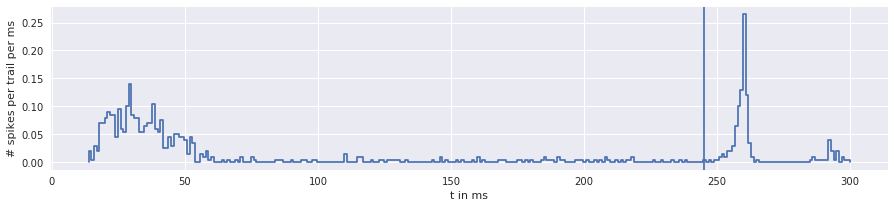

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,3))
bins = I.temporal_binning(mdb['spike_times'])
I.histogram(bins, fig = fig)
fig.axes[-1].set_xlabel('t in ms')
fig.axes[-1].set_ylabel('# spikes per trail per ms')
fig.add_subplot(111).axvline(245)
fig

Usually, we discard the first 100ms of simulation since the cell needs that time to reach a "steady state". At 245ms, a C2 whisker stimulus occurs, followed by a strong evoked response at ~260 ms.

##### plot single voltage traces, mean and std

In [8]:
import dask
import matplotlib.pyplot as plt
mean = mdb['voltage_traces'].mean(axis = 0).compute(get = dask.multiprocessing.get)
std = mdb['voltage_traces'].std(axis = 0).compute(get = dask.multiprocessing.get)

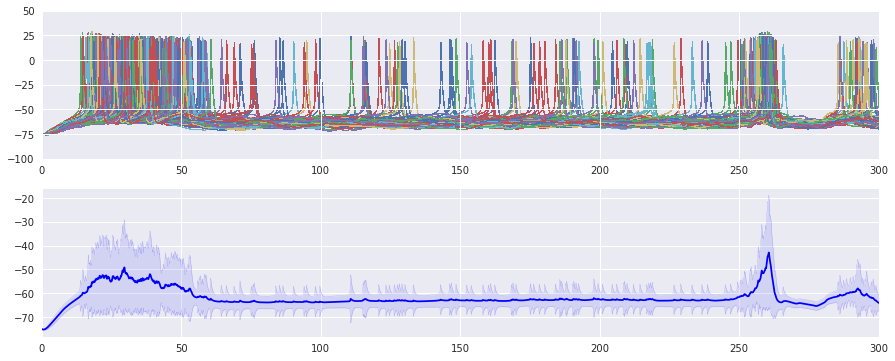

In [31]:
fig = plt.figure(figsize = (15,6))
I.manylines(mdb['voltage_traces'], fig = fig.add_subplot(211), axis = [0, 300, -100, 50])
I.average_std(mean, std, fig = fig.add_subplot(212))
fig.axes[-1].set_xlim(0,300)
fig

##### How many trails spike in the interval 245ms to 265 ms?

In [28]:
st = mdb['spike_times']
st.head() # each line corresponds to one simulation trail, the columns contain the spike times

,0,1,2,3,4,5
sim_trail_index,,,,,,
20170327-0745_seed122328974/000000,17.950,31.825,253.650,260.75,NaN,NaN
20170327-0745_seed122328974/000001,26.175,33.525,41.975,51.90,NaN,NaN
20170327-0745_seed122328974/000002,28.950,40.925,120.700,257.30,NaN,NaN
20170327-0745_seed122328974/000003,18.050,25.000,33.050,44.35,190.250,NaN
20170327-0745_seed122328974/000004,29.550,39.350,94.800,124.50,259.325,NaN


In [33]:
st.apply(lambda x: ((x >= 245) & (x < 265)).any(), axis = 1).value_counts()

True     159
False     41
dtype: int64

# How to simulate current injections
This is an example of a coincident current injection in the apical dendrite and the soma, which triggers a burst.

In [8]:
'''
Created on Jan 28, 2013

passive properties L2 neuron model

@author: robert
'''

import sys
import time
import os, os.path
import neuron
import single_cell_parser as scp
import numpy as np
import matplotlib.pyplot as plt
h = neuron.h

def test_BAC_firing(fname, iAmpSoma = 1.9, iAmpApical = 0.5):
    neuronParameters = scp.build_parameters(fname)
    scp.load_NMODL_parameters(neuronParameters)
    cellParam = neuronParameters.neuron
    
    cell = scp.create_cell(cellParam, scaleFunc=scale_apical) #we need to scale apical dendrite
    
    totalArea = 0.0
    somaArea = 0.0
    apicalArea = 0.0
    basalArea = 0.0
    axonArea = 0.0
    for sec in cell.sections:
        totalArea += sec.area
        if sec.label == 'Soma':
            somaArea += sec.area
        if sec.label == 'ApicalDendrite':
            for seg in sec:
                apicalArea += h.area(seg.x, sec=sec)
#            apicalArea += sec.area
        if sec.label == 'Dendrite':
            basalArea += sec.area
        if sec.label == 'AIS' or sec.label == 'Myelin':
            axonArea += sec.area
    
    print 'total area = %.2f micron^2' % totalArea
    print 'soma area = %.2f micron^2' % somaArea
    print 'apical area = %.2f micron^2' % apicalArea
    print 'basal area = %.2f micron^2' % basalArea
    print 'axon area = %.2f micron^2' % axonArea
    
    tStop = 600.0
    neuronParameters.sim.tStop = tStop
#    neuronParameters.sim.dt = 0.005
    tIStart = 295.0
    duration = 5.0
    apicalDt = 5.0

    apicalTauRise = 1.0
    apicalTauDecay = 5.0
    apicalBifurcationDistance = 800.0 # cell ID 86
    apicalInjectionDistance = 620.0 # cell ID 86

    apicalBifurcationSec = get_apical_section_at_distance(cell, apicalBifurcationDistance)
    
    visualize = False
#    t1, vmSoma1, vmApical1 = soma_injection(cell, iAmpSoma, tIStart, duration, apicalBifurcationSec, apicalInjectionDistance, neuronParameters.sim, visualize)
#    t2, vmSoma2, vmApical2 = apical_injection(cell, apicalBifurcationSec, apicalInjectionDistance, iAmpApical, tIStart, apicalTauRise, apicalTauDecay, neuronParameters.sim, visualize)
    t3, vmSoma3, vmApical3 = soma_apical_injection(cell, iAmpSoma, tIStart, duration, apicalBifurcationSec, apicalInjectionDistance, iAmpApical, apicalDt, apicalTauRise, apicalTauDecay, neuronParameters.sim, visualize)

    
    showPlots = True
    if showPlots:

        plt.title('apical current injection amp=%.2f nA' % (iAmpApical))
        plt.legend()
        plt.figure(3)
        plt.plot(t3, vmSoma3, 'k', label='soma')
        plt.plot(t3, vmApical3, 'r', label='apical')
        plt.xlabel('time [ms]')
        plt.ylabel('Vm [mV]')
        plt.title('soma + apical current injection amp=%.2f/%.2f nA' % (iAmpSoma, iAmpApical))
        plt.legend()
        plt.show()
    
    cell.t = t3
    return cell

def soma_apical_injection(cell, somaAmplitude, somaDelay, somaDuration, apicalBifurcationSec, apicalInjectionDistance, apicalAmplitude,\
                          apicalDelayDt, apicalTauRise, apicalTauDecay, simParam, saveVisualization=False):
    print 'selected apical section:'
    print apicalBifurcationSec.name()
    somaDist = cell.distance_to_soma(apicalBifurcationSec, 0.0)
    apicalx = (apicalInjectionDistance - somaDist)/apicalBifurcationSec.L
    print 'distance to soma: %.2f micron' % somaDist
    print 'apicalInjectionDistance: %.2f micron' % apicalInjectionDistance
    print 'apicalx: %.2f' % apicalx
    
    iclamp = h.IClamp(0.5, sec=cell.soma)
    iclamp.delay = somaDelay
    iclamp.dur = somaDuration
    iclamp.amp = somaAmplitude
    
    iclamp2 = h.epsp(apicalx, sec=apicalBifurcationSec)
    iclamp2.onset = somaDelay + apicalDelayDt
    iclamp2.imax = apicalAmplitude
    iclamp2.tau0 = apicalTauRise
    iclamp2.tau1 = apicalTauDecay
        
    print 'soma current injection: %.2f nA' % somaAmplitude
    print 'apical current injection: %.2f nA' % apicalAmplitude
    tVec = h.Vector()
    tVec.record(h._ref_t)
    startTime = time.time()
    scp.init_neuron_run(simParam, vardt=False)
    stopTime = time.time()
    dt = stopTime - startTime
    print 'NEURON runtime: %.2f s' % dt
    
    vmSoma = np.array(cell.soma.recVList[0])
    minSeg = -1
    mindx = 1.0
    for i in range(len(apicalBifurcationSec.segx)):
        x = apicalBifurcationSec.segx[i]
        dx = np.abs(x-apicalx)
        if dx < mindx:
            mindx = dx
            minSeg = i
    vmApical = np.array(apicalBifurcationSec.recVList[minSeg])
    t = np.array(tVec)
    
    if saveVisualization:
        visFName = 'visualization/soma_apical_injection_86/'
        visFName += 'soma_apical_current_injection_soma_amp_%.1fnA_dur_%.0fms_apical_amp_%.1fnA_dt_%.0fms' % (somaAmplitude, somaDuration, apicalAmplitude, apicalDelayDt)
        scp.write_cell_simulation(visFName, cell, ['Vm'], t, allPoints=True)
    #cell.re_init_cell()
    
    return t, vmSoma, vmApical

def get_apical_section_at_distance(cell, distance):
    '''determine interior apical dendrite section (i.e. no ending section)
    closest to given distance'''
    closestSec = None
    minDist = 1e9
    for branchSectionList in cell.branches['ApicalDendrite']:
        for sec in branchSectionList:
            secRef = h.SectionRef(sec=sec)
            if secRef.nchild():
                dist = cell.distance_to_soma(sec, 1.0)
                dist = abs(dist - distance)
                if dist < minDist:
                    minDist = dist
                    closestSec = sec
    return closestSec

def scale_apical(cell):
    '''
    scale apical diameters depending on
    distance to soma; therefore only possible
    after creating complete cell
    '''
    dendScale = 2.5
    scaleCount = 0
    for sec in cell.sections:
        if sec.label == 'ApicalDendrite':
            dist = cell.distance_to_soma(sec, 1.0)
            if dist > 1000.0:
                continue
            if scaleCount > 32:
                break
            scaleCount += 1
            for i in range(sec.nrOfPts):
                oldDiam = sec.diamList[i]
                newDiam = dendScale*oldDiam
                h.pt3dchange(i, newDiam, sec=sec)
    
    print 'Scaled %d apical sections...' % scaleCount

def write_sim_results(fname, t, v):
    with open(fname, 'w') as outputFile:
        header = '# simulation results\n'
        header += '# t\tvsoma'
        header += '\n\n'
        outputFile.write(header)
        for i in range(len(t)):
            line = str(t[i])
            line += '\t'
            line += str(v[i])
            line += '\n'
            outputFile.write(line)


In [9]:
path_to_cell_param_file = '/home/abast/test/86_CDK_20041214_BAC_run5_soma_Hay2013_C2center_apic_rec.param' #adapt this path
cell = test_BAC_firing(path_to_cell_param_file, iAmpApical = 0.45)

ValueError: unknown url type: /home/abast/test/86_CDK_20041214_BAC_run5_soma_Hay2013_C2center_apic_rec.param

# How to simulate synaptic input